In [235]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country/Country-data.csv


In [236]:
dataset=pd.read_csv("/kaggle/input/country/Country-data.csv")
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [237]:
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [238]:
data=dataset

In [239]:
data.drop(['country'],axis=1,inplace=True)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [240]:
data.describe()

    

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [241]:
mean=np.mean(data,axis=0)
std=np.std(data,axis=0)
data=(data-mean)/std
data
data=data.to_numpy()

In [242]:
#scaler=StandardScaler()
#dataset[['child_mort_T','exports_T','health_T','imports_T','income_T','inflation_T','life_expec_T','total_fer_T','gdpp_T']]=scaler.fit_transform(dataset)

In [243]:
#dataset.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'],axis=1,inplace=True)
#dataset

In [244]:
class KMeansClustering:
    def __init__(self,k=3):
        self.k=k
        self.centroids=None
     
    @staticmethod
    def euclidean_distance(data_point,centroids):
        return np.sqrt(np.sum((centroids - data_point)**2,axis=1))
     
    def fit(self,X, maxiters=500):
        self.centroids=np.random.uniform(np.amin(X,axis=0), np.amax(X,axis=0),size=(self.k,X.shape[1]))
        
        for _ in range(maxiters):
            y=[]
            for dp in X:
                distances=KMeansClustering.euclidean_distance(dp,self.centroids)
                cluster_num=np.argmin(distances)
                y.append(cluster_num)
            y=np.array(y)
            cluster_indices=[]
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))
            
            cluster_centers=[]
            
            for i,indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])
            
            if np.max(self.centroids-np.array(cluster_centers))<0.0001:
                break
            else:
                self.centroids=np.array(cluster_centers)
        return y
        

In [245]:
kmeans=KMeansClustering(k=3)
labels=kmeans.fit(data)

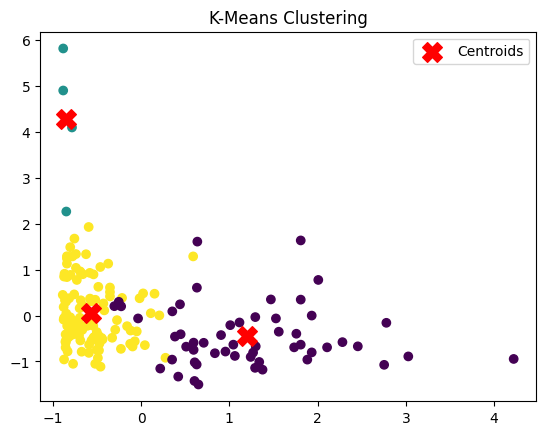

In [246]:
kmeans=KMeansClustering(k=3)
labels=kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('')
plt.ylabel('')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [247]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score on Test Data:",silhouette_avg)

Silhouette Score on Test Data: 0.31883700966379347
